# TOV EVOLUTION: GRID 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import kuibit.cactus_scalars as cs
import kuibit.simdir as sd

from kuibit import grid_data as gd

import seaborn as sns

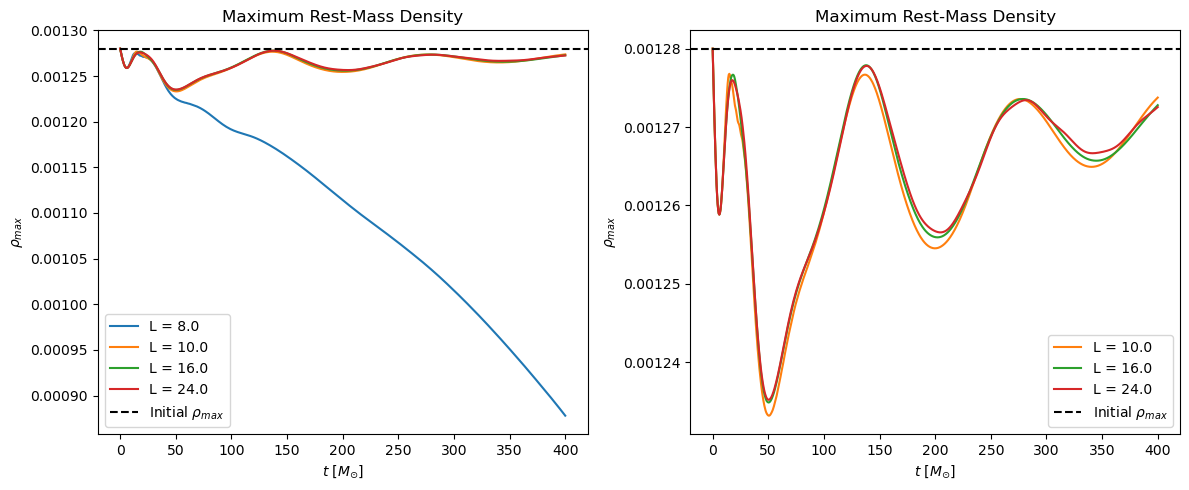

In [2]:
filenames = ["./TOV_domain_8/", "./TOV_domain_10/", "./TOV_domain_16/", './TOV_example_original/']
grids = [8., 10., 16., 24.]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
for filename, grid in zip(filenames, grids):
    sim = sd.SimDir(filename)
    timeseries = sim.timeseries
    rho_max = timeseries.maximum.fields.rho
    ax1.plot(rho_max, label=r"L = " + str(grid))

ax1.axhline(rho_max.values[0], linestyle = '--', color = 'black', label = r'Initial $\rho_{max}$')
ax1.set_xlabel(r'$t$ [$M_{\odot}$]')
ax1.set_ylabel(r'$\rho_{max}$')
ax1.legend()
ax1.set_title('Maximum Rest-Mass Density')

palette = sns.color_palette("tab10")
i = 0
for filename, grid in zip(filenames[1:], grids[1:]):
    sim = sd.SimDir(filename)
    timeseries = sim.timeseries
    rho_max = timeseries.maximum.fields.rho
    plt.plot(rho_max, label=r"L = " + str(grid), color = palette[i+1])
    i = i+1
    
ax2.axhline(rho_max.values[0], linestyle = '--', color = 'black', label = r'Initial $\rho_{max}$')
ax2.set_xlabel(r'$t$ [$M_{\odot}$]')
ax2.set_ylabel(r'$\rho_{max}$')
ax2.legend()
ax2.set_title('Maximum Rest-Mass Density')
plt.tight_layout()
plt.savefig('density L.png', dpi = 300)
plt.show()

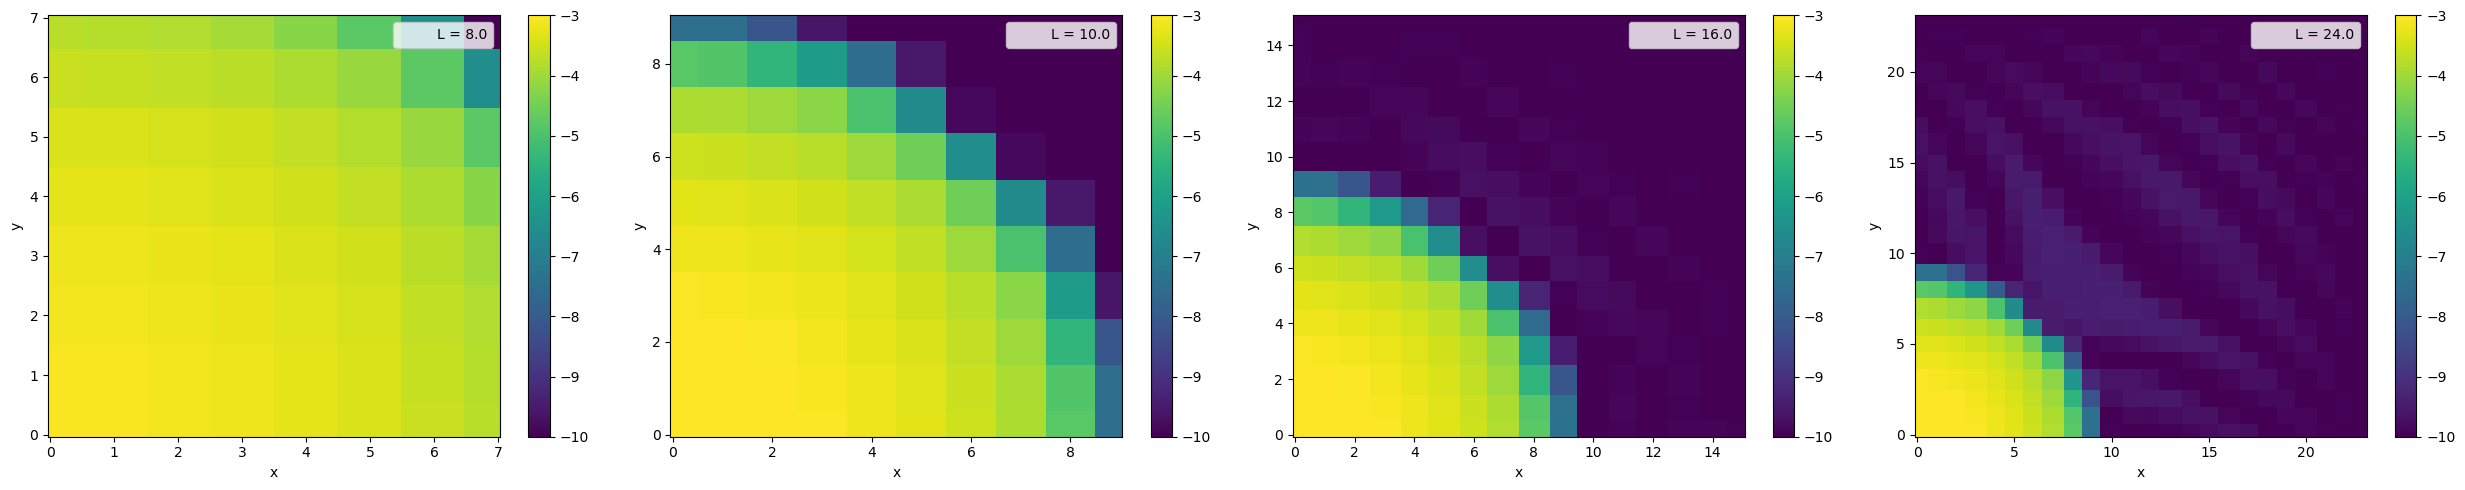

In [3]:
i = 0
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

fig = plt.figure(figsize = (25, 5))
for filename, grid in zip(filenames, grids):  
    sim = sd.SimDir(filename)
    ax = fig.add_subplot(140+int(i+1))
    gf = sim.gf
    vars2D = gf.xy
    rho = vars2D.fields.rho
    small_grid = gd.UniformGrid([100, 100], x0=[0, 0], x1=[grid-1, grid-1]) #lower left, upper right coordinates
    rho_small = rho.read_on_grid(rho.iterations[-1], small_grid)
    cf = ax.pcolormesh(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), vmin=-10, vmax=-3)
    plt.colorbar(cf)
    plt.xlabel('x')
    plt.ylabel('y')
    i = i+1
    legend_patch = mpatches.Patch(color = 'none', label=r'L = '+str(grid))
    ax.legend(handles=[legend_patch])

plt.tight_layout()
plt.savefig('grid L.png', dpi = 300)
plt.show()

In [4]:
from IPython.display import HTML
import matplotlib.animation as animation
ims = []
fig,ax = plt.subplots()

for i in rho.iterations[0::1]:
    rho_small = rho.read_on_grid(i, small_grid)
    ax.set_xlabel(r'$x (M_\odot)$')
    ax.set_ylabel(r'$y (M_\odot)$')
    ax.set_aspect('equal')
    im = ax.pcolormesh(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), animated=True, vmin=-10, vmax=-3)
    plt.plot()
    #plt.colorbar(im) #gives error if uncommented
    title = ax.text(0.5,1.05,('Time='+str(rho.available_times[i//2048])), size=plt.rcParams["axes.titlesize"], ha="center", transform=ax.transAxes)
    ims.append([im, title])
    plt.close()
    

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
HTML(ani.to_jshtml())